<div class="alert alert-block alert-success">

# Case Study 📓: Cloth Retailer

**[Case Study Details](https://docs.google.com/document/d/1BK9u8xFA9g8VMVZBLP1kCl6AqRp-Ue91y8p4mrWaKUo/edit?usp=sharing
)**
    
**Can you help the Sales manager to decide amongst the four scenarios?**
  
    
**You would need to use linear regression to establish the relationship between Price, advertisement, promotion, and units sold.
Essentially, you need to estimate the coefficient values of the equation that will establish the relationship between independent variables and dependent variables (unit sales)**


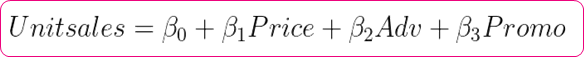

   
</div>

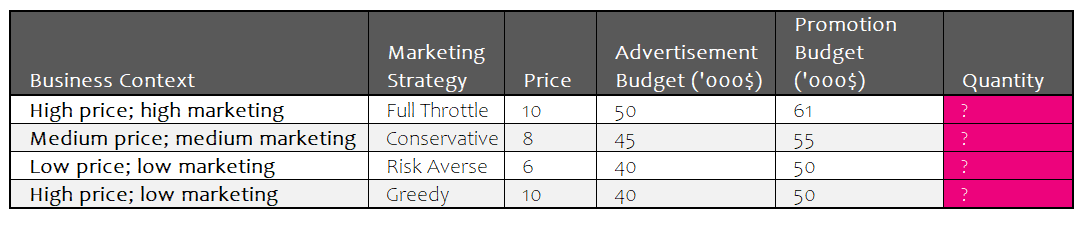

##  <font color= darkred> Import modules and data </font>

In [41]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight") # styling the charts

# data prep
from sklearn.model_selection import train_test_split

# ML algos
from sklearn.linear_model import LinearRegression

# metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [42]:
# loading the data 
df = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/tshirt_sales.csv")
scenario = pd.read_csv("https://raw.githubusercontent.com/vkoul/data/main/misc/business_scenario.csv")

In [43]:
scenario.columns
df.columns

Index(['Year', 'Month', 'units_sold', 'dollar_price', 'advertisment',
       'promotions'],
      dtype='object')

##  <font color= darkred> Data Inspection</font>

### <font color= darkred> Numerical inspection and summaries </font>

**Data Inspect**

In [44]:
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          24 non-null     int64  
 1   Month         24 non-null     int64  
 2   units_sold    24 non-null     int64  
 3   dollar_price  24 non-null     float64
 4   advertisment  24 non-null     float64
 5   promotions    24 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 1.2 KB


,Year,Month,units_sold,dollar_price,advertisment,promotions
0,2019,1,73959,8.75,50.04,61.13
1,2019,2,71544,8.99,50.74,60.19
2,2019,3,78587,7.50,50.14,59.16
3,2019,4,80364,7.25,50.27,60.38
4,2019,5,78771,7.40,51.25,59.71


**Missing values check**

In [45]:
# missing values
df.isna().sum()

Year            0
Month           0
units_sold      0
dollar_price    0
advertisment    0
promotions      0
dtype: int64

**Select only the key columns**

In [46]:
key_columns = ['units_sold', 'dollar_price', 'advertisment','promotions']

In [47]:
key_columns

['units_sold', 'dollar_price', 'advertisment', 'promotions']

**Numerical summary of the key columns**

In [48]:
df[key_columns].describe().round(2)

,units_sold,dollar_price,advertisment,promotions
count,24.00,24.00,24.00,24.00
mean,74258.29,8.13,50.15,59.88
std,3164.39,0.51,1.28,0.68
min,69003.00,7.25,48.00,58.00
25%,71959.50,7.90,49.40,59.64
50%,74103.00,8.15,50.12,59.90
75%,76354.50,8.43,50.77,60.24
max,80364.00,8.99,54.00,61.13


##   <font color= darkred> EDA </font>

### Univariate Analysis

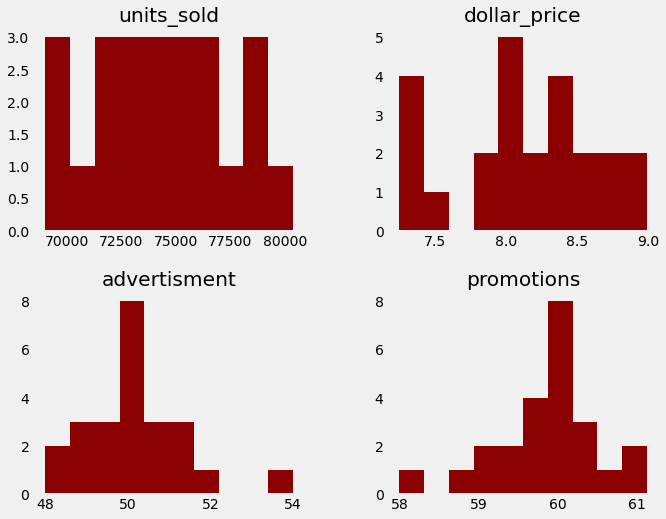

In [49]:
# plot the histograms of the key columns
df[key_columns].hist(figsize = (10, 8), grid = False, color= 'darkred');

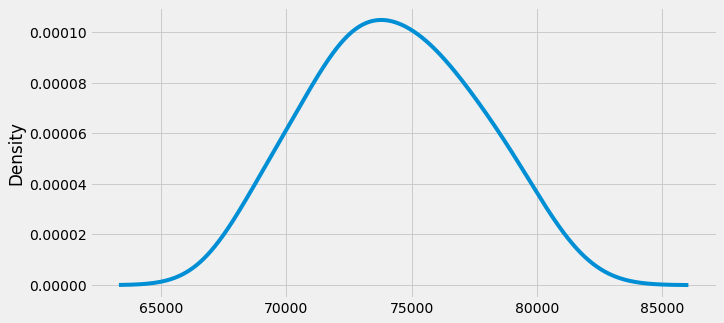

In [50]:
df['units_sold'].plot.kde(figsize = (10, 5));

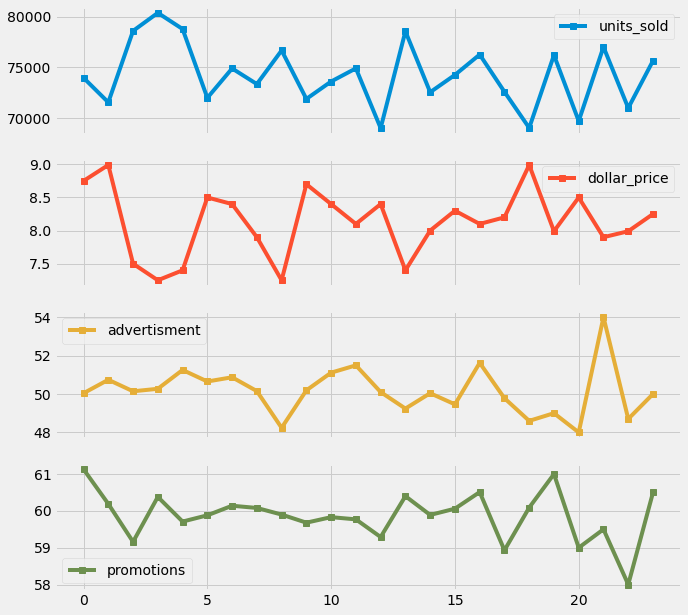

In [51]:
df[key_columns].plot.line(figsize = (10, 10), subplots=True, marker = 's');

### Bivariate Analysis

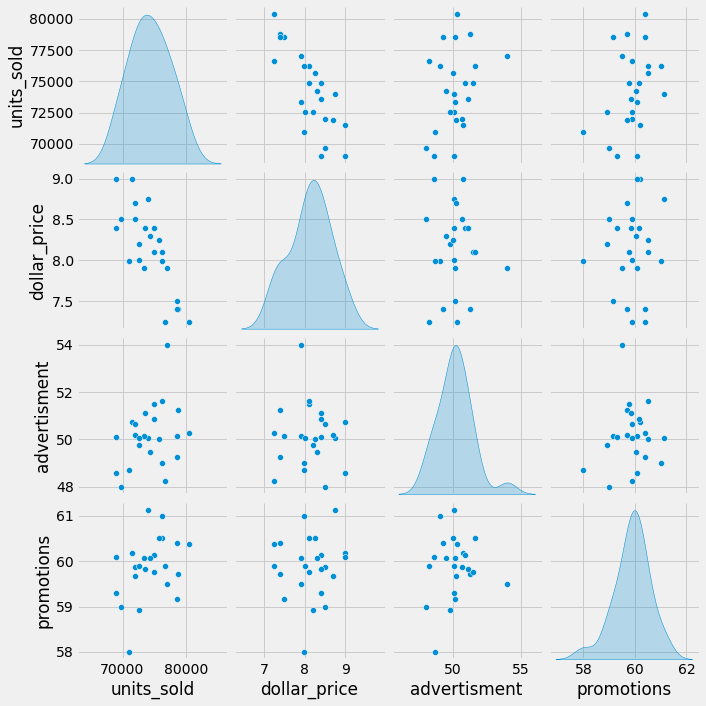

In [52]:
sns.pairplot(df[key_columns], diag_kind = 'kde');

**Correlation between values**

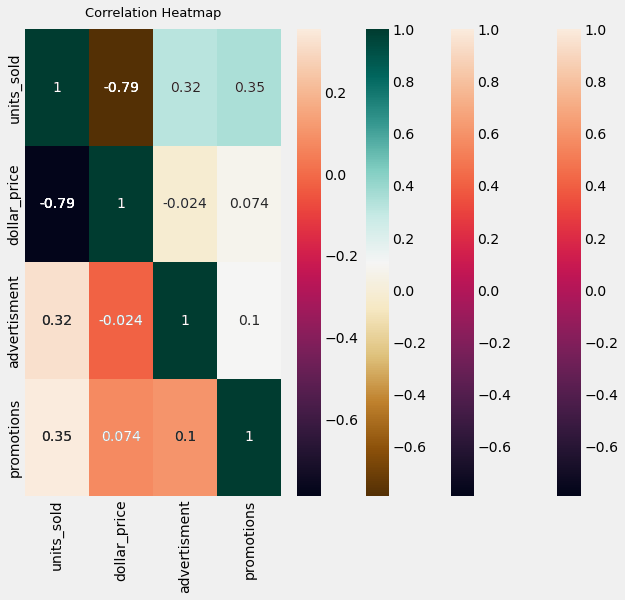

In [53]:
corr = df[key_columns].corr().round(3)

plt.figure(figsize = (10,8))

# basic one
sns.heatmap(corr, annot = True);

sns.heatmap(corr, annot = True).set_title('Correlation Heatmap', fontdict={'fontsize':13}, pad=12); # ADD TITLE

sns.heatmap(corr, annot = True, cmap='BrBG'); # DIVERGING COLOR SCHEME

tri_corr = np.triu(np.ones_like(corr, dtype=np.bool)) # returns upper triangle of an array.
sns.heatmap(corr, annot = True, mask = tri_corr); # TRIANGLE VIEW

**Visualise Linear relationship between variables**

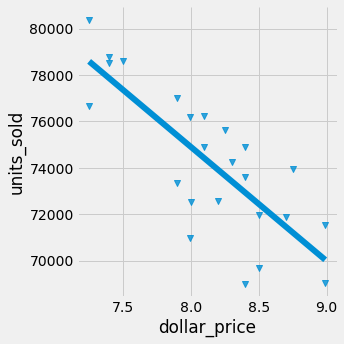

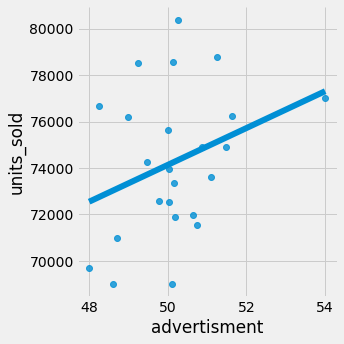

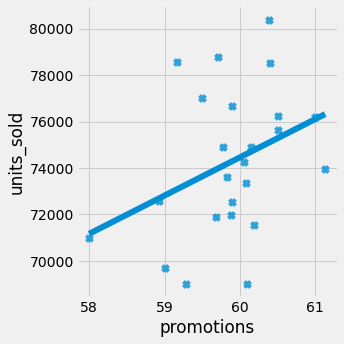

In [54]:
sns.lmplot(x = "dollar_price", y = "units_sold", data = df,  order = 1, markers= ['v'], ci = False);
sns.lmplot(x = "advertisment", y = "units_sold", data = df, ci = False, order = 1, markers= ['o']);
sns.lmplot(x = "promotions", y = "units_sold", data = df, ci = False, order = 1, markers= ['x']);

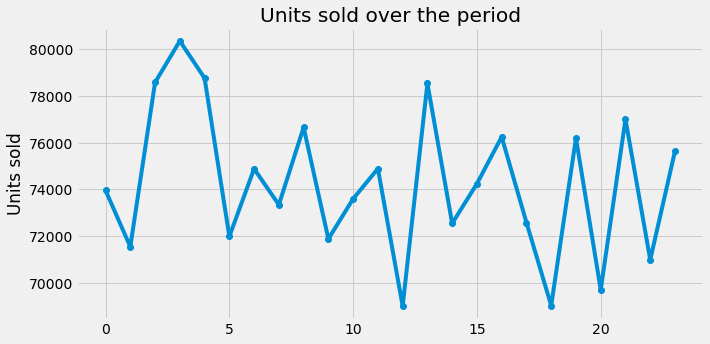

In [55]:
# Plotting the linecharts

# plot size
plt.figure(figsize = (10,5))

# line chart
df["units_sold"].plot(kind = "line", label = "actual_units", marker = "o");


# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period")

# show
plt.show();

##  <font color= darkred> Data Prep for Linear Regression </font>

In [56]:
# splitting the data 

X = df[key_columns].drop(columns = "units_sold")
y = df["units_sold"]


# # doing train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [57]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)

print("\n")

print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

display(x_train.head())
display(y_train.head())


x_train:  (19, 3)
x_test:  (5, 3)


y_train:  (19,)
y_test:  (5,)


,dollar_price,advertisment,promotions
6,8.40,50.87,60.14
15,8.30,49.46,60.06
0,8.75,50.04,61.13
13,7.40,49.24,60.40
2,7.50,50.14,59.16


6     74885
15    74247
0     73959
13    78542
2     78587
Name: units_sold, dtype: int64

## <font color= darkred> Model building </font> 💥⚡

In [58]:
y.mean()

74258.29166666667

In [59]:
# call the model 
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

# make the predictions on train data
predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.87
RMSE: 1144.65
MAE: 809.04


In [60]:
# call the model 
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

# # calculate the score
print("R^2: {:.2f}".format(model.score(x_train, y_train)))

# make the predictions on train data
predictions = np.round(model.predict(x_train),1)

# accuracy metrics
print("RMSE: {:.2f}".format(mean_squared_error(y_train, predictions, squared = False)))
print("MAE: {:.2f}".format(mean_absolute_error(y_train, predictions))) # the 2f means that its is for 2 decimal

R^2: 0.87
RMSE: 1144.65
MAE: 809.04


### <font color= darkred> Train Data predictions </font>

In [61]:
# combine the actual data and predictions
output = pd.DataFrame({"actual": y_train, 
                       "predictions": predictions})

# sort the index
output = output.sort_index()

# new output
output.head()

,actual,predictions
0,73959,73447.8
1,71544,70763.2
2,78587,76394.2
3,80364,80170.6
4,78771,78657.9


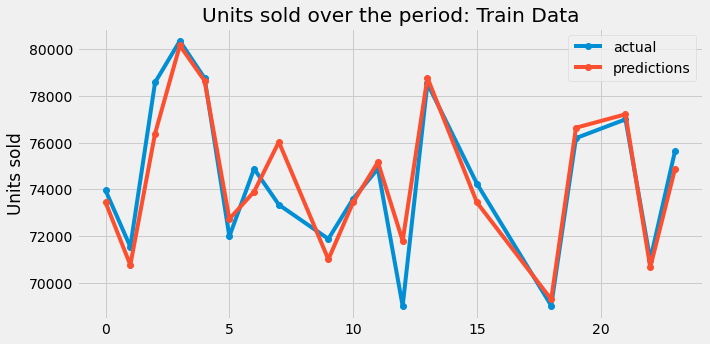

In [62]:
# add prediction back to the data and visualise

#plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(output["actual"], marker = "o", label = "actual")
plt.plot(output["predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Train Data")

# show labels
plt.legend()

# show
plt.show();

###  <font color= darkred> Test Data predictions </font>

In [63]:
# predicting for test data 

test_predictions = np.round(model.predict(x_test),1)

# calculate the score
print("R^2 of test: {:.2f}".format(model.score(x_test, y_test)))


# accuracy metrics
print("RMSE of test: {:.2f}".format(mean_squared_error(y_test, test_predictions, squared = False)))
print("MAE of test: {:.2f}".format(mean_absolute_error(y_test, test_predictions))) # the 2f means that its is for 2 decimal

R^2 of test: 0.74
RMSE of test: 1330.18
MAE of test: 1033.68


In [64]:
# creating a df with test data and predictions

test_output = pd.DataFrame({"actual": y_test, 
                           "test_predictions": test_predictions})

# sorting index
test_output = test_output.sort_index()
test_output.head()

,actual,test_predictions
8,76659,78027.3
14,72543,75067.5
16,76253,76676.5
17,72582,71984.0
20,69701,69446.9


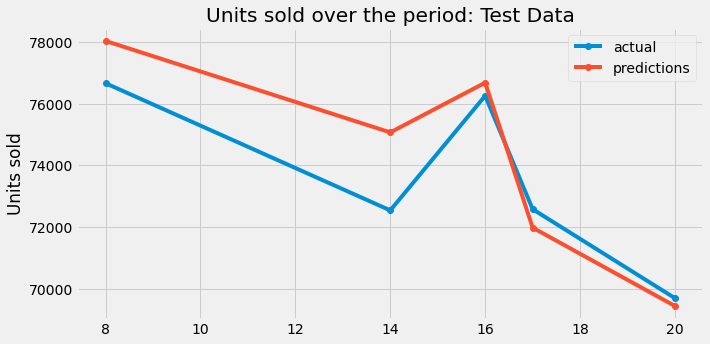

In [65]:
# add prediction back to the data and visualise

# plot size
plt.figure(figsize = (10,5))

# line chart
plt.plot(test_output["actual"], marker = "o", label = "actual")
plt.plot(test_output["test_predictions"], marker = "o", label = "predictions")

# labels
plt.ylabel("Units sold")
plt.title("Units sold over the period: Test Data")

# show labels
plt.legend()

# show
plt.show();

###  <font color= darkred> Model Coeficeients </font>

A linear regression model is of the type: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_2 $ ; where $\beta_0$ is the intercept and other $\beta$ are the coefficient of the columns. 

The linear regression model will help us find the value of these $\beta$

In [66]:
# printing the results after rounding off
print("The intercept is:", np.round(model.intercept_,1))
print("The co-efficients are:", np.round(model.coef_,1))

The intercept is: -27846.9
The co-efficients are: [-5357.    598.5  1933.9]


Putting the above information in a data-frame which is readable

,Coefficient
dollar_price,-5357.0
advertisment,598.5
promotions,1933.9


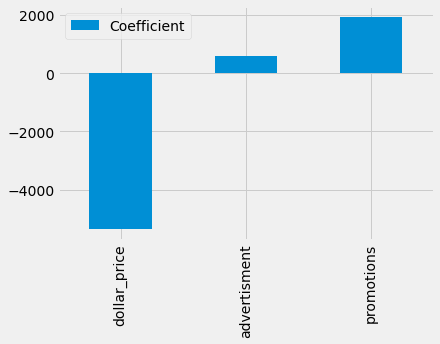

In [67]:
coeffs = pd.DataFrame(np.round(model.coef_,1), x_train.columns, columns = ["Coefficient"])
display(coeffs)
coeffs.plot(kind = "bar");

Hence our equation will be:

 **$ units sold = -27846.9 + -5357.0  \cdot dollar price + 598.5 \cdot advertisment +  1933.9 \cdot promotions$**

##  <font color= red> Decision making </font>💲

In [68]:
scenario
scenario[['dollar_price', 'advertisment','promotions']]

,dollar_price,advertisment,promotions
0,10,50,61
1,8,45,55
2,6,40,50
3,10,40,50


In [69]:
# making the predictions
projections = np.round(model.predict(scenario[['dollar_price', 'advertisment','promotions']]),0)
projections

array([66476., 62594., 60646., 39218.])

In [70]:
# adding the predictions to the data 
scenario["projections"] = projections
scenario.style.set_properties(**{'background-color': 'darkred',
                                   'color': 'white',
                                   'border-color': 'white'}, subset= ['projections'])

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.000000
1,Medium price; medium marketing,Scenario 2,8,45,55,62594.000000
2,Low price; low marketing,Scenario 3,6,40,50,60646.000000
3,High price; low marketing,Scenario 4,10,40,50,39218.000000


In [71]:
# Filter out the final scenario
scenario[scenario["projections"] == scenario["projections"].max()]

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.0


Another way to highlight in Pandas

In [72]:
scenario.style.apply(lambda x: ['background:darkorange' if x in "Scenario 1" else None for x in scenario.scenario])

,business_context,scenario,dollar_price,advertisment,promotions,projections
0,High price; high marketing,Scenario 1,10,50,61,66476.000000
1,Medium price; medium marketing,Scenario 2,8,45,55,62594.000000
2,Low price; low marketing,Scenario 3,6,40,50,60646.000000
3,High price; low marketing,Scenario 4,10,40,50,39218.000000
